In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

Import The dataset

In [2]:
df = pd.read_csv("Hitters.csv")
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df.shape

(322, 21)

Remove the Column Unnamed from dataset which consist of Names of players

In [4]:
df.drop(columns="Unnamed: 0",axis = 1, inplace=True)

In [5]:
df.info()
df.shape  # There are 322 observation and 20 variables.
df.isnull().sum() 
df.describe([0.05, 0.25, 0.50, 0.75, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

,count,mean,std,min,5%,25%,50%,75%,95%,99%,max
AtBat,322.0,380.928571,153.404981,16.0,161.00,255.25,379.5,512.00,609.90,658.59000,687.0
Hits,322.0,101.024845,46.454741,1.0,39.00,64.00,96.0,137.00,174.00,210.79000,238.0
HmRun,322.0,10.770186,8.709037,0.0,0.00,4.00,8.0,16.00,28.95,33.00000,40.0
Runs,322.0,50.909938,26.024095,0.0,17.00,30.25,48.0,69.00,94.00,107.79000,130.0
RBI,322.0,48.027950,26.166895,0.0,14.00,28.00,44.0,64.75,96.00,112.37000,121.0
Walks,322.0,38.742236,21.639327,0.0,11.05,22.00,35.0,53.00,78.00,93.58000,105.0
Years,322.0,7.444099,4.926087,1.0,1.00,4.00,6.0,11.00,17.00,19.79000,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,216.50,816.75,1928.0,3924.25,7125.60,8749.97000,14053.0
CHits,322.0,717.571429,654.472627,4.0,54.00,209.00,508.0,1059.25,2017.15,2500.34000,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,2.00,14.00,37.5,90.00,265.65,373.12000,548.0


Correlation Matrix here presents the Dependancy of variables

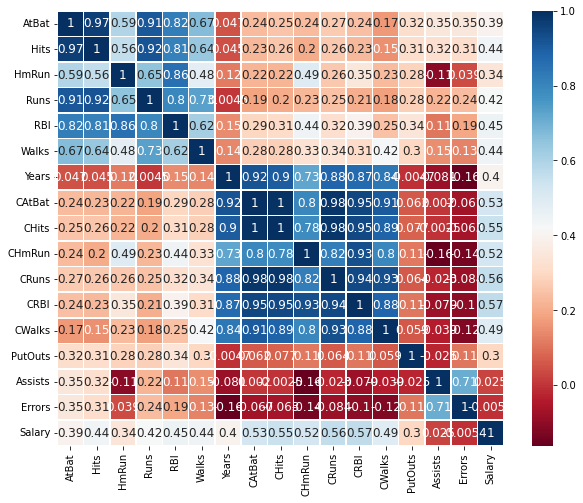

In [14]:
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
fig = sns.heatmap(df.corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
plt.show(block=True)

In [16]:
df.dropna(inplace=True)

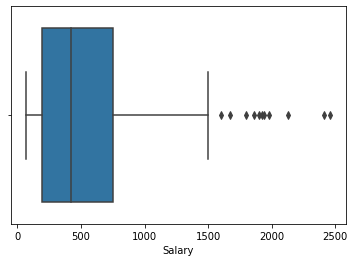

In [17]:
sns.boxplot(x=df["Salary"])
plt.show()

Presenting only Salary satisfuying a specific criteria

In [18]:
q3 = 0.90
salary_up = int(df["Salary"].quantile(q3))
df = df[(df["Salary"] < salary_up)]

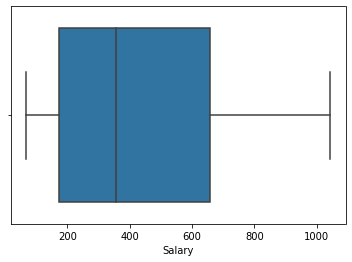

In [19]:
sns.boxplot(x=df["Salary"])
plt.show()

Encoder to perform Qualitative values into Numerical

In [20]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]
for col in binary_cols:
    labelencoder = LabelEncoder()
    df[col] = labelencoder.fit_transform(df[col])

In [21]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,480.0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,500.0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,91.5,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,750.0,0


Normalising The Data

In [23]:
data = df.sub(df.mean())
data = data/data.std()

In [45]:
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-0.537945,-0.530446,-0.453749,-1.176222,-0.439375,0.017982,1.429498,0.435759,0.270827,0.131413,-0.023677,0.398586,0.549660,1.049977,0.908814,1.540518,-0.519603,0.207775,0.195967,1.058940
2,0.603287,0.613118,0.889390,0.583584,0.968591,1.843798,-0.847175,-0.378728,-0.330137,0.050367,-0.328355,-0.095498,0.107967,-0.948366,0.908814,2.579651,-0.254810,0.798556,0.213880,-0.940339
3,0.721585,0.869836,1.133598,0.541683,1.217055,-0.080711,0.808587,1.408233,1.447319,2.238592,1.568812,1.814068,0.466843,1.049977,-1.095673,-0.269584,-0.736870,-0.826092,0.285532,1.058940
4,-0.496193,-0.390418,-0.087439,-0.547720,-0.273732,-0.426135,-1.054145,-0.926777,-0.896125,-0.638518,-0.881171,-0.829947,-0.799082,1.049977,-1.095673,2.265397,-0.539972,-0.678397,-1.177953,1.058940
5,1.403541,1.523301,-0.820060,0.918785,0.098965,-0.179403,0.808587,0.863755,0.744604,-0.543965,0.541703,0.138190,-0.164148,-0.948366,0.908814,0.074001,2.046853,2.423204,1.181177,-0.940339


Seperating the Salary column to an independent y data

In [24]:
y = data["Salary"]
X = data.drop(["Salary"], axis=1)

Using The Standard Random Tree Regression on the model

In [25]:
model = RandomForestRegressor()
model.fit(X,y)
feature_imp = pd.DataFrame({'Feature': X.columns, 'Value': model.feature_importances_})
feature_imp.sort_values("Value", ascending=False)

,Feature,Value
8,CHits,0.310157
7,CAtBat,0.202705
10,CRuns,0.115231
0,AtBat,0.085549
1,Hits,0.051712
11,CRBI,0.046756
4,RBI,0.026541
3,Runs,0.021541
15,PutOuts,0.020858
9,CHmRun,0.018101


**PCR** Inclusion by calculating the Eigen Values

In [26]:
from sklearn.decomposition import PCA
XX = np.dot(X.transpose(),X)
eig = np.linalg.eig(XX)
eigv = eig[1]

In [49]:
print(eigv.shape)

(19, 19)


In [73]:
U = eigv.T
V = U[:]
V.shape

(19, 19)

In [74]:
W = np.dot(X,V.T)

In [75]:
print(W)

[[-0.45886736  1.71233702 -1.23717533 ...  0.1049995   0.02367922
   0.05262856]
 [-0.54009996 -2.69489451  1.14518455 ...  0.02391845 -0.00445397
  -0.02090975]
 [-4.03550856  0.39079188 -0.55546141 ... -0.25520724  0.05165965
   0.01096132]
 ...
 [ 0.83259005 -0.79421423  0.89145298 ... -0.08750033 -0.00747414
   0.08105635]
 [-2.08250233 -2.58067826  0.55484864 ... -0.01099011  0.00449637
  -0.02209974]
 [-2.18292787 -0.62681296  1.04732563 ... -0.31595771  0.04024832
  -0.07340995]]


In [76]:
model.fit(X,y)

RandomForestRegressor()

The Model Ran good and gave better results than Random Forest Regression